In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.interpolate import UnivariateSpline

file_path = 'data_multinomics_processed.csv'
data_multiomics = pd.read_csv(file_path)
data_multiomics.head

<bound method NDFrame.head of     Unnamed: 0  Study Subject ID Number     Sex  sex_bin  timepoint  \
0            0                    10565    Male        1          1   
1            1                    10565    Male        1          2   
2            2                    10565    Male        1          3   
3            3                    10565    Male        1          4   
4            4                    10603  Female        0          1   
..         ...                      ...     ...      ...        ...   
63          63                    10631  Female        0          4   
64          64                    30101    Male        1          1   
65          65                    30101    Male        1          2   
66          66                    30101    Male        1          3   
67          67                    30101    Male        1          4   

    gestational_age  immune_system  immune_system.1  immune_system.2  \
0                11       0.053164         0.

In [ ]:
def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

#Sex is still defined in the binary variable, but string not usable in model 
data_multiomics = data_multiomics.drop("Sex", axis=1)

extractor(data_multiomics)
selected_feature = selected_features

In [2]:

data_multiomics = data_multiomics[['Unnamed: 0', 'Study Subject ID Number', 'sex_bin', 'timepoint', 'gestational_age', 'immune_system', 'immune_system.1', 'immune_system.2', 'immune_system.3', 'immune_system.4', 'immune_system.5', 'immune_system.6', 'immune_system.7', 'immune_system.8', 'immune_system.9', 'immune_system.10', 'immune_system.11', 'immune_system.12', 'immune_system.13', 'immune_system.14', 'immune_system.15', 'immune_system.16', 'immune_system.17', 'immune_system.18', 'immune_system.19', 'immune_system.20', 'immune_system.22', 'immune_system.23', 'immune_system.25', 'immune_system.26', 'immune_system.27', 'immune_system.30', 'immune_system.31', 'immune_system.32', 'immune_system.35', 'immune_system.37', 'immune_system.38', 'immune_system.39', 'immune_system.42', 'immune_system.43', 'immune_system.44', 'immune_system.45', 'immune_system.50', 'immune_system.63', 'immune_system.64', 'immune_system.67', 'immune_system.75', 'immune_system.76', 'immune_system.77', 'immune_system.78', 'immune_system.80', 'immune_system.81', 'immune_system.82', 'immune_system.83', 'immune_system.84', 'immune_system.85', 'immune_system.87', 'immune_system.88', 'immune_system.89', 'immune_system.91', 'immune_system.92', 'immune_system.93', 'immune_system.94', 'immune_system.95', 'immune_system.97', 'immune_system.98', 'immune_system.100', 'immune_system.101', 'immune_system.102', 'immune_system.103', 'immune_system.105', 'immune_system.106', 'immune_system.107', 'immune_system.108', 'immune_system.109', 'immune_system.110', 'immune_system.111', 'immune_system.112', 'immune_system.113', 'immune_system.114', 'immune_system.116', 'immune_system.117', 'immune_system.118', 'immune_system.120', 'immune_system.122', 'immune_system.123', 'immune_system.125', 'immune_system.126', 'immune_system.127', 'immune_system.128', 'immune_system.130', 'immune_system.131', 'immune_system.134', 'immune_system.135', 'immune_system.136', 'immune_system.137', 'immune_system.138', 'immune_system.139', 'immune_system.141', 'immune_system.142', 'immune_system.143', 'immune_system.144', 'immune_system.145', 'immune_system.147', 'immune_system.150', 'immune_system.151', 'immune_system.157', 'immune_system.158', 'immune_system.159', 'immune_system.160', 'immune_system.161', 'immune_system.163', 'immune_system.164', 'immune_system.167', 'immune_system.169', 'immune_system.170', 'immune_system.172', 'immune_system.173', 'immune_system.175', 'immune_system.176', 'immune_system.177', 'immune_system.178', 'immune_system.179', 'immune_system.180', 'immune_system.181', 'immune_system.182', 'immune_system.184', 'immune_system.185', 'immune_system.187', 'immune_system.188', 'immune_system.189', 'immune_system.191', 'immune_system.192', 'immune_system.193', 'immune_system.195', 'immune_system.198', 'immune_system.200', 'immune_system.201', 'immune_system.202', 'immune_system.203', 'immune_system.205', 'immune_system.206', 'immune_system.207', 'immune_system.209', 'immune_system.210', 'immune_system.212', 'immune_system.213', 'immune_system.214', 'immune_system.215', 'immune_system.216', 'immune_system.217', 'immune_system.218', 'immune_system.219', 'immune_system.221', 'immune_system.222', 'immune_system.223', 'immune_system.224', 'immune_system.225', 'immune_system.226', 'immune_system.227', 'immune_system.228', 'immune_system.229', 'immune_system.230', 'immune_system.231', 'immune_system.233', 'immune_system.234', 'immune_system.236', 'immune_system.237', 'immune_system.238', 'immune_system.239', 'immune_system.241', 'immune_system.242', 'immune_system.243', 'immune_system.245', 'immune_system.246', 'immune_system.248', 'immune_system.249', 'immune_system.250', 'immune_system.251', 'immune_system.252', 'immune_system.253', 'immune_system.254', 'immune_system.255', 'immune_system.257', 'immune_system.258', 'immune_system.260', 'immune_system.261', 'immune_system.262', 'immune_system.263', 'immune_system.264', 'immune_system.265', 'immune_system.269', 'immune_system.272', 'immune_system.273', 'immune_system.274', 'immune_system.275', 'immune_system.277', 'immune_system.278', 'immune_system.279', 'immune_system.281', 'immune_system.282', 'immune_system.283', 'immune_system.284', 'immune_system.285', 'immune_system.286', 'immune_system.287', 'immune_system.289', 'immune_system.291', 'immune_system.293', 'immune_system.295', 'immune_system.296', 'immune_system.297', 'immune_system.298', 'immune_system.300', 'immune_system.301', 'immune_system.302', 'immune_system.304', 'immune_system.306', 'immune_system.307', 'immune_system.309', 'immune_system.310', 'immune_system.311', 'immune_system.314', 'immune_system.316', 'immune_system.321', 'immune_system.322', 'immune_system.323', 'immune_system.325', 'immune_system.326', 'immune_system.329', 'immune_system.334', 'immune_system.335', 'immune_system.336', 'immune_system.341', 'immune_system.343', 'immune_system.344', 'immune_system.345', 'immune_system.346', 'immune_system.347', 'immune_system.350', 'immune_system.351', 'immune_system.352', 'immune_system.354', 'immune_system.356', 'immune_system.357', 'immune_system.359', 'immune_system.360', 'immune_system.361', 'immune_system.371', 'immune_system.372', 'immune_system.373', 'immune_system.374', 'immune_system.376', 'immune_system.377', 'immune_system.379', 'immune_system.384', 'immune_system.385', 'immune_system.386', 'immune_system.387', 'immune_system.391', 'immune_system.396', 'immune_system.397', 'immune_system.398', 'immune_system.401', 'immune_system.402', 'immune_system.404', 'immune_system.409', 'immune_system.410', 'immune_system.414', 'immune_system.421', 'immune_system.422', 'immune_system.423', 'immune_system.426', 'immune_system.427', 'immune_system.429', 'immune_system.434', 'immune_system.435', 'immune_system.436', 'immune_system.437', 'immune_system.438', 'immune_system.439', 'immune_system.440', 'immune_system.441', 'immune_system.443', 'immune_system.444', 'immune_system.445', 'immune_system.447', 'immune_system.448', 'immune_system.450', 'immune_system.451', 'immune_system.452', 'immune_system.454', 'immune_system.456', 'immune_system.457', 'immune_system.458', 'immune_system.459', 'immune_system.461', 'immune_system.464', 'immune_system.471', 'immune_system.472', 'immune_system.473', 'immune_system.476', 'immune_system.477', 'immune_system.479', 'immune_system.497', 'immune_system.509', 'immune_system.510', 'immune_system.511', 'immune_system.514', 'immune_system.515', 'immune_system.516', 'immune_system.517', 'immune_system.518', 'immune_system.519', 'immune_system.521', 'immune_system.522', 'immune_system.523', 'immune_system.525', 'immune_system.526', 'immune_system.527', 'immune_system.529', 'immune_system.531']]
data_multiomics.shape

(68, 322)

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset (assuming data_multiomics is already loaded)
df_multi = data_multiomics.copy()

# Selecting relevant features for PCA (e.g., immune system features)
X = df_multi.loc[:, df_multi.columns.str.startswith("immune_system")]

# Standardizing the features
scaler = StandardScaler()
Features_std = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(Features_std)

# Creating a DataFrame with the principal components
principalDataframe = pd.DataFrame(data=principalComponents, 
                                  columns=[f'PC{i+1}' for i in range(principalComponents.shape[1])])

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Sum of explained variance ratio: {explained_variance.sum()}")

# Inspect the resulting principal components DataFrame
print(principalDataframe.head())



Explained variance ratio: [0.14948322 0.12508806 0.09760703 0.07030546 0.05880556 0.04271166
 0.03844649 0.03330265 0.03013026 0.02855346 0.02651824 0.02445493
 0.02239399 0.01950089 0.01784724 0.01748337 0.01682119 0.01510503
 0.01249906 0.01159827 0.01110968 0.01057698 0.00871538 0.00813841
 0.00732786 0.00664929 0.00648263 0.00583719 0.00558552 0.00514734
 0.00493859 0.00433481 0.00398814 0.00354999 0.0035335  0.00332936
 0.00316526 0.00308057 0.00270248 0.00248416 0.00233839 0.00218107
 0.00204193 0.00197628 0.00183829 0.00171681 0.00164941 0.00151406
 0.00140763 0.00134329]
Sum of explained variance ratio: 0.9873403593818812
        PC1        PC2        PC3       PC4        PC5       PC6       PC7  \
0 -1.349696 -11.836684   8.104540 -0.909441  -0.441473 -1.095595  5.670760   
1 -2.074454  -7.095458   3.633928 -2.174315  -0.870834 -3.633363  1.435763   
2  1.600777  -8.112838   7.827641 -1.102392   4.407645 -2.258185  2.980020   
3 -6.735890  -4.562339   3.515875 -3.197247   0.92

In [4]:
targetDataframe = data_multiomics[['gestational_age']]
identifier = data_multiomics[["Study Subject ID Number" , "sex_bin" , "timepoint" ]]
newDataframe = pd.concat([identifier, principalDataframe, targetDataframe],axis = 1)
newDataframe

,Study Subject ID Number,sex_bin,timepoint,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,gestational_age
0,10565,1,1,-1.349696,-11.836684,8.104540,-0.909441,-0.441473,-1.095595,5.670760,...,-0.538766,0.746268,-0.223468,-0.226325,-0.279778,-0.938590,0.037085,-0.530787,-1.108376,11
1,10565,1,2,-2.074454,-7.095458,3.633928,-2.174315,-0.870834,-3.633363,1.435763,...,0.421130,-1.528479,1.190921,0.460027,-0.195789,0.068810,1.275676,0.133883,0.290687,18
2,10565,1,3,1.600777,-8.112838,7.827641,-1.102392,4.407645,-2.258185,2.980020,...,0.963703,-0.364828,0.730419,0.237161,0.143592,0.776399,0.292225,0.404831,0.429740,32
3,10565,1,4,-6.735890,-4.562339,3.515875,-3.197247,0.922498,-5.570329,-0.087167,...,-1.532020,1.333067,-1.817705,-0.532179,0.747585,0.059246,-0.586046,-0.301348,0.478382,0
4,10603,0,1,-4.786583,-5.638608,-12.092429,-2.703894,12.667733,9.352991,3.607349,...,-0.002843,0.353941,-0.789694,0.386407,-0.493348,-0.372521,-0.381137,0.073899,0.161752,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,10631,0,4,-3.986740,-3.953134,-2.689153,-3.914181,-0.529730,-5.627105,-5.442329,...,-0.393903,-1.432617,-1.121463,0.252985,0.305882,0.602111,-0.270014,0.241006,-0.704547,0
64,30101,1,1,-4.400811,-3.187954,-2.888913,-0.163421,-3.732406,0.360453,-0.477209,...,-1.532366,0.375033,0.208180,-0.762168,-0.702375,-0.620275,-1.055493,-0.614347,0.164111,10
65,30101,1,2,-2.660415,-0.035743,-0.612686,0.388644,-3.861410,1.342743,0.569735,...,-0.211454,0.824359,-0.558630,1.347939,-0.487710,0.146179,0.524118,0.190083,-0.092631,19
66,30101,1,3,-2.467040,-2.477019,0.459884,-0.390738,-3.955218,1.130669,0.763006,...,-0.174154,0.374673,-0.580697,1.534889,-0.096397,0.482038,1.086378,1.130474,0.451663,31


In [5]:
feat= data_multiomics.drop(columns=["Study Subject ID Number", "gestational_age"])
X = feat
y = data_multiomics['gestational_age']
groups = data_multiomics['Study Subject ID Number']


In [6]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Hyperparameter grid for ElasticNet
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5, 10.0],
    'l1_ratio': [ 0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [10000]
}

# GridSearchCV for the Elastic Net
grid_search = GridSearchCV(ElasticNet(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=logo.split(X, y, groups), verbose=3, n_jobs=-1)
grid_search.fit(X, y, groups=groups)

# Include the best parameters from the grid search
best_params_grid = grid_search.best_params_
print(f'Best parameters from grid search: {best_params_grid}')

# Final model with the best parameters
elastic_net = ElasticNet(**best_params_grid)
elastic_net.fit(X, y)

# Evaluate the model
y_pred = elastic_net.predict(X)
print(y_pred)

# Calculate MSE and R²
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Fitting 17 folds for each of 25 candidates, totalling 425 fits
Best parameters from grid search: {'alpha': 1.0, 'l1_ratio': 0.5, 'max_iter': 10000}
[15.14326547 18.03388418 27.3030458   2.65257989 14.34005791 17.05279124
 23.29167485 -1.55003049 13.88753853 15.0285083  23.69157778  4.38624499
 10.01489165 14.45633299 22.46974913  2.6685617  11.55011264 14.45166143
 19.2260412   2.3836541  11.98852395 15.96991586 24.09885112 -0.65415467
 13.79354442 14.93318829 17.9756311   3.2189361  11.37525814 18.05839056
 22.99087121  3.25293204 10.32413743 16.3988982  18.04350117  4.7484608
 10.34209432 12.69280144 21.27161869  1.12332853 11.37714256 15.8305203
 23.57132288  2.94726973 14.29714916 17.04610678 20.38080366  3.22581863
 13.30941388 17.27005881 24.34819595  6.66112368 12.79691193 18.9843043
 26.0235868  -0.05539354 13.04552424 15.3972129  22.36189163  3.33198838
 14.48360862 18.73057037 22.92988896  3.08094363 16.09654928 17.12066107
 20.71306779  1.2648856 ]
Mean Squared Error: 12.201

## Old gestational ages prior to setting as zero needed for trajectory analysis(all zero predictions will move to g_age around 40); also delivery zone needs to be grey 


In [19]:
columns_to_read = [ 'gestational_age']

full_gest_age = pd.read_csv("data_multinomics.csv", usecols=columns_to_read, skiprows=[1])

full_gest_age

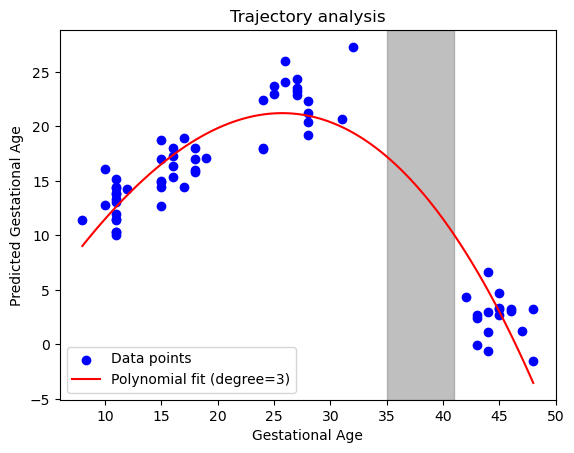

In [39]:
#define y as the full gestational data
y = np.array(full_gest_age)

# Scatter plot
plt.scatter(y, y_pred, color='blue', label='Data points')

# Polynomial regression
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree)
y_poly = poly.fit_transform(y.reshape(-1, 1))
model = LinearRegression()
model.fit(y_poly, y_pred)

# Generate a range of values for plotting the curve
y_range = np.linspace(min(y), max(y), 100).reshape(-1, 1)
y_range_poly = poly.transform(y_range)
y_curve = model.predict(y_range_poly)

# Add grey background for a range of x-axis values
plt.axvspan(35, 41, color='grey', alpha=0.5)

# Plot the curve
plt.plot(y_range, y_curve, color='red', label=f'Polynomial fit (degree={degree})')
plt.xlabel('Gestational Age')
plt.ylabel('Predicted Gestational Age')
plt.title("Trajectory analysis")
plt.legend()
plt.show()
